# Exercise: Decision Trees
* start by importing the DecisionTreeClassifier
* you'll want pandas as well

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

## Read in the Breast Cancer dataset, __`bcan.csv`__

In [2]:
data = pd.read_csv('data/bcan.csv', na_values='?')

In [3]:
data.head()

,id,Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses,Diag
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


## Drop the __`id`__ since it's not going to the model

In [4]:
data = data.drop('id', axis=1)

In [5]:
data.()

,Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses,Diag
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


## Remember that __`sklearn`__ wants the features in 2-d matrix, and the targets in a 1-d array

In [15]:
data = data.dropna() # drop the missing rows, there aren't that many
#y = data['Diag'] # targets are the final column
#data = data.drop('Diag', axis=1) # now remove the final column
X = data.values # features are the values from the dataframe
y

0      0
1      0
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     2
13     0
14     2
15     2
16     0
17     0
18     2
19     0
20     2
21     2
22     0
24     0
25     2
26     0
27     0
28     0
29     0
30     0
      ..
669    2
670    2
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    2
681    2
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    2
692    0
693    0
694    0
695    0
696    2
697    2
698    2
Name: Diag, Length: 683, dtype: int64

## Fit the model
* if you get an error here, figure out why

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Use export_graphviz to generate the dot file
* __`feature_names`__ should be the list of column headers
* __`class_names`__ should be the targets

In [13]:
fnames = 'Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses'.split(',')
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="bcan.dot",
               feature_names=fnames,
               class_names=['benign', 'malignant'],
               rounded=True,
               filled=True)

## Generate a PNG images from the dot file and open it

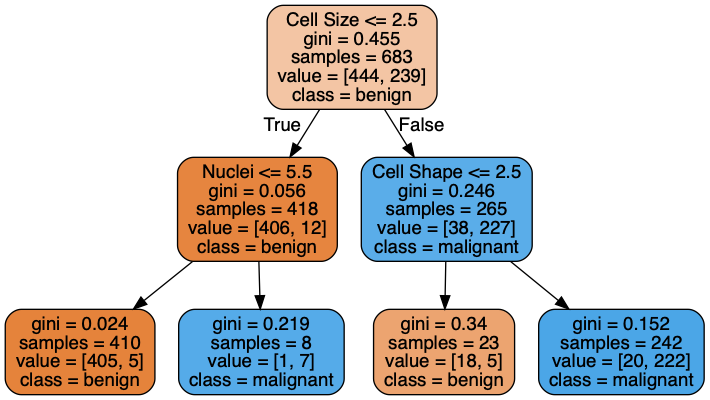

In [14]:
!dot -Tpng bcan.dot -o bcan.png
from IPython.display import Image
Image('bcan.png')

## How well did the model do?

In [16]:
tree_clf.score(X, y)

0.9546120058565154

## Do we do better if we increase the tree depth?

In [17]:
tree_clf = DecisionTreeClassifier(max_depth=8)
tree_clf.fit(X, y)
tree_clf.score(X, y)

0.9970717423133236

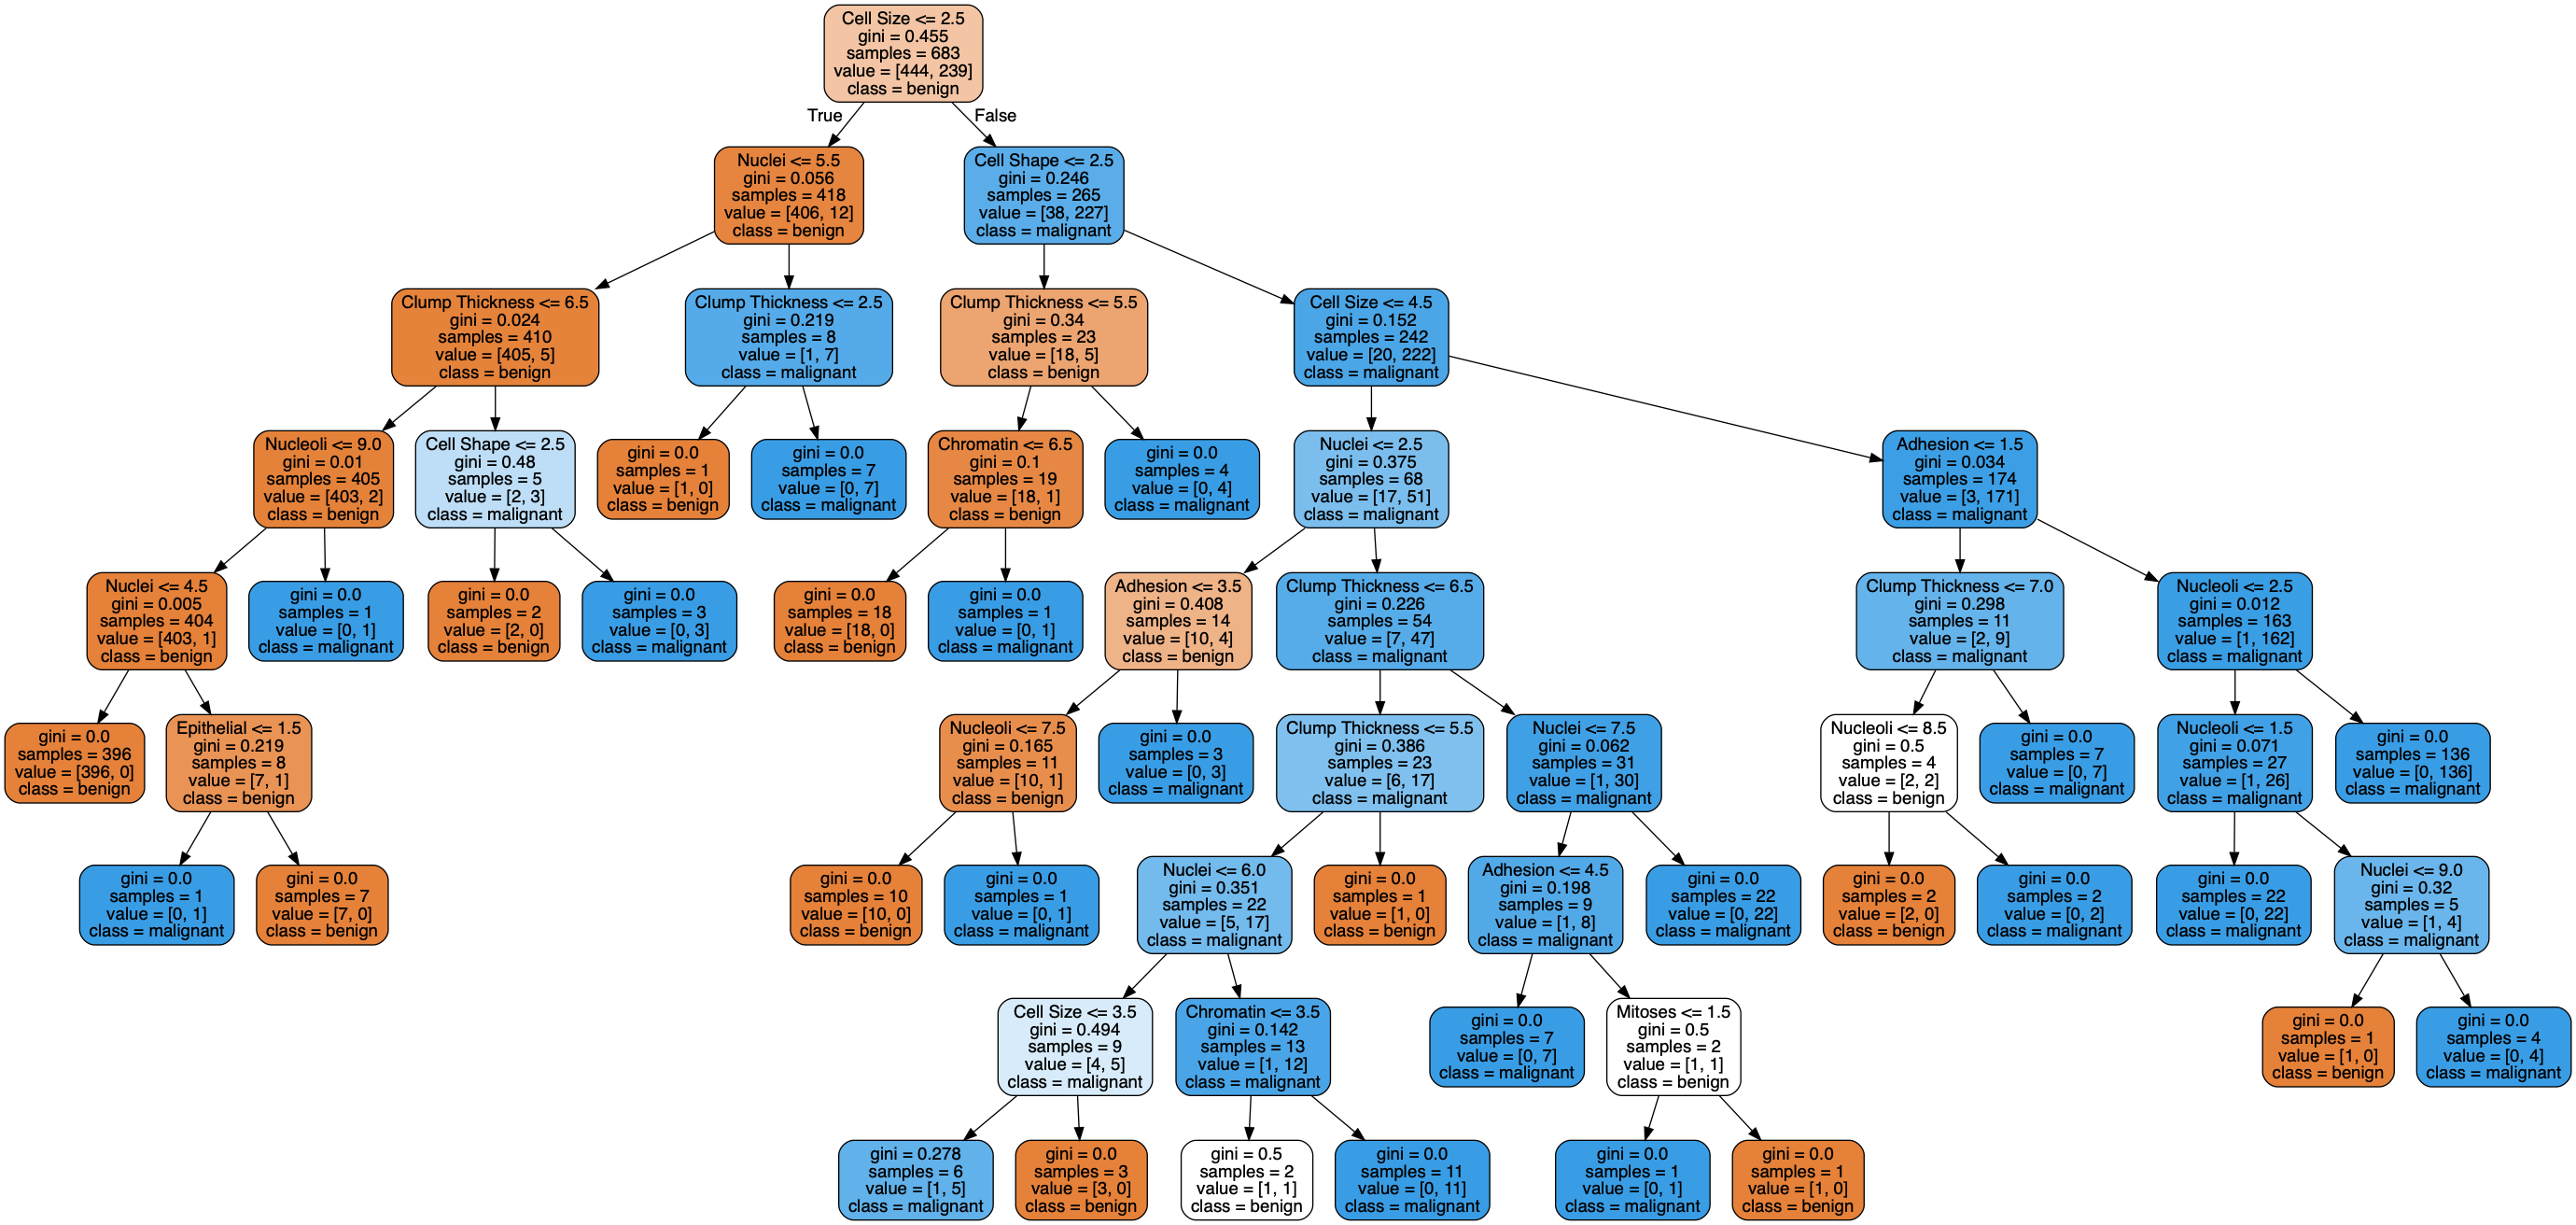

In [18]:
fnames = 'Clump Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses'.split(',')
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="bcan.dot",
               feature_names=fnames,
               class_names=['benign', 'malignant'],
               rounded=True,
               filled=True)
!dot -Tpng bcan.dot -o bcan.png
from IPython.display import Image
Image('bcan.png')

## Why might we not want to do that?